In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


In [2]:
url = "https://raw.githubusercontent.com/alishermutalov/praktikum-datasets/refs/heads/praktikum/Churn_Modelling.xls"
df = pd.read_csv(url, index_col='RowNumber')
df

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1


In [3]:
pd.crosstab(df['Geography'], df['Exited'], normalize='index')

Exited,0,1
Geography,,
France,0.838452,0.161548
Germany,0.675568,0.324432
Spain,0.833266,0.166734


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1.1+ MB


In [5]:
df.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [6]:
df.isna().sum()

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
df['Exited'].value_counts() / len(df) * 100

Exited
0    79.63
1    20.37
Name: count, dtype: float64

In [8]:
exited_rate = df['Exited'].value_counts() / len(df) * 100

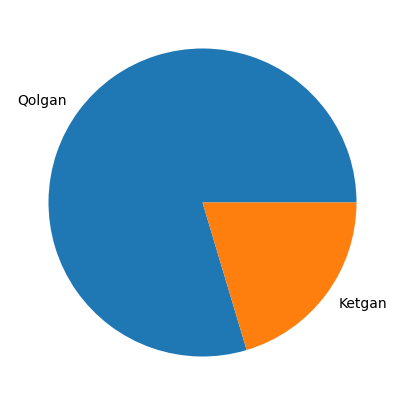

In [9]:
plt.figure(figsize=(5,5))
plt.pie(exited_rate, labels=['Qolgan', 'Ketgan'])
plt.show()

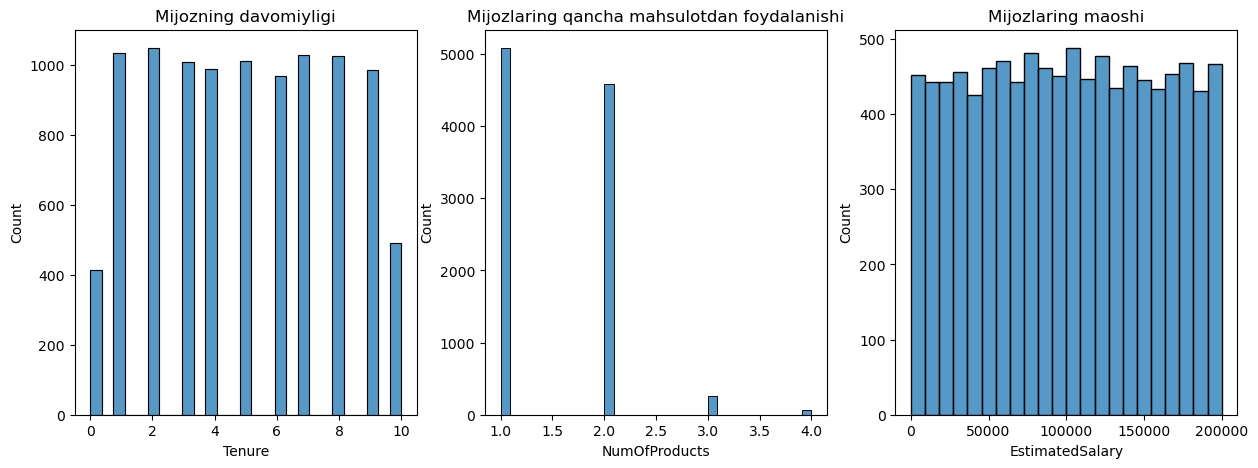

In [10]:
fig, axes = plt.subplots(1, 3, figsize=(15,5))

#Tenure
sns.histplot(x='Tenure', data=df, ax=axes[0])
axes[0].set_title('Mijozning davomiyligi')

#NumOfProducts
sns.histplot(x='NumOfProducts', data=df, ax=axes[1])
axes[1].set_title('Mijozlaring qancha mahsulotdan foydalanishi')

#EstimatedSalary
sns.histplot(x='EstimatedSalary', data=df, ax=axes[2])
axes[2].set_title('Mijozlaring maoshi')

plt.show()

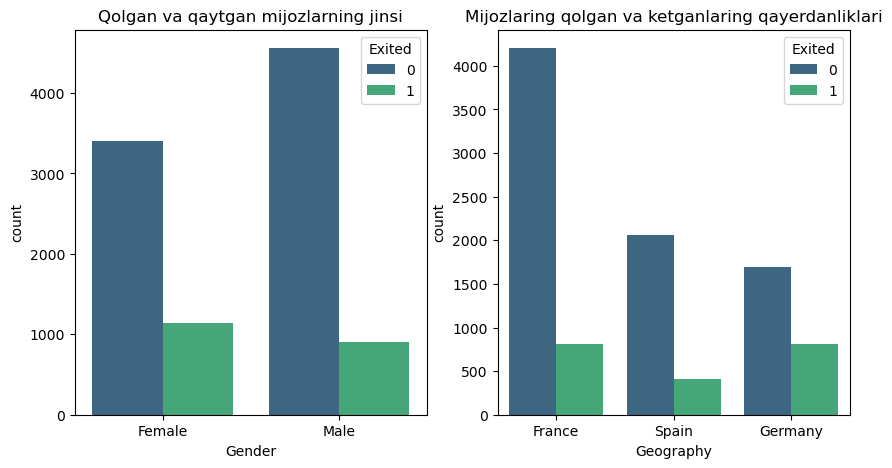

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(10,5))

#Gender
sns.countplot(x='Gender', hue='Exited', palette='viridis', data=df, ax=axes[0])
axes[0].set_title('Qolgan va qaytgan mijozlarning jinsi')

#Geography
sns.countplot(x='Geography', hue='Exited', palette='viridis', data=df, ax=axes[1])
axes[1].set_title('Mijozlaring qolgan va ketganlaring qayerdanliklari')

plt.show()

In [12]:
df.corrwith(df['Exited'], numeric_only=True).abs().sort_values(ascending=False)

Exited             1.000000
Age                0.285323
IsActiveMember     0.156128
Balance            0.118533
NumOfProducts      0.047820
CreditScore        0.027094
Tenure             0.014001
EstimatedSalary    0.012097
HasCrCard          0.007138
CustomerId         0.006248
dtype: float64

In [13]:
df.drop(columns=['CustomerId', 'Surname'], axis=1, inplace=True)

In [14]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,
1,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [15]:
encoded = pd.get_dummies(df)
encoded.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
RowNumber,,,,,,,,,,,,,,
1,619,42,2,0.00,1,1,1,101348.88,1,True,False,False,True,False
2,608,41,1,83807.86,1,0,1,112542.58,0,False,False,True,True,False
3,502,42,8,159660.80,3,1,0,113931.57,1,True,False,False,True,False
4,699,39,1,0.00,2,0,0,93826.63,0,True,False,False,True,False
5,850,43,2,125510.82,1,1,1,79084.10,0,False,False,True,True,False


In [16]:
X = encoded.drop('Exited', axis=1)
y = encoded['Exited']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [18]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Logistic Regression

Logistic Regression


              precision    recall  f1-score   support

           0       0.82      0.97      0.89      1593
           1       0.59      0.19      0.28       407

    accuracy                           0.81      2000
   macro avg       0.71      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000

Model aniqligi :  0.808


Confusion matrix :
 [[1540   53]
 [ 331   76]]


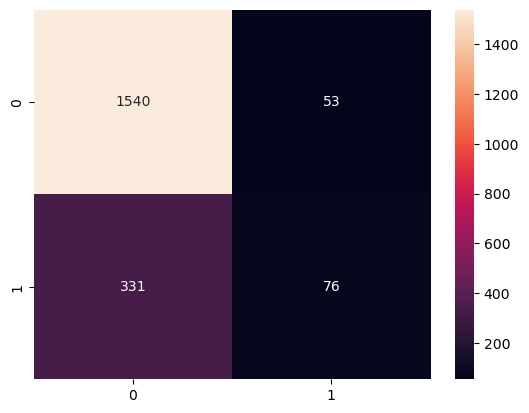

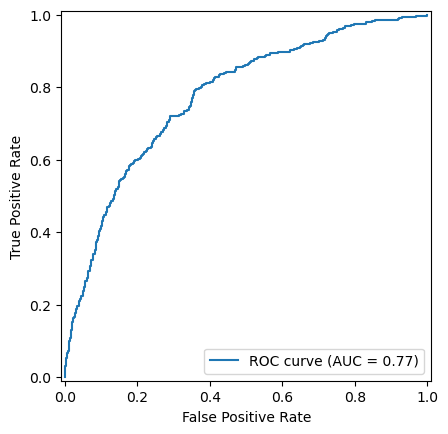

In [19]:
LR_model = LogisticRegression()
LR_model.fit(X_train, y_train)

y_pred = LR_model.predict(X_test)
y_pred_prob = LR_model.predict_proba(X_test)[:, 1]

print("Logistic Regression")
print("\n")
print(metrics.classification_report(y_test, y_pred))
print("Model aniqligi : ", metrics.accuracy_score(y_test, y_pred))

conf_mat = metrics.confusion_matrix(y_test, y_pred)
print("\n")
print(f"Confusion matrix :\n", conf_mat)
sns.heatmap(conf_mat, annot=True, fmt='g')
plt.show()

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

### Support Vector Machine

Support Vector Machine


              precision    recall  f1-score   support

           0       0.86      0.98      0.92      1593
           1       0.85      0.39      0.54       407

    accuracy                           0.86      2000
   macro avg       0.86      0.69      0.73      2000
weighted avg       0.86      0.86      0.84      2000

Model aniqligi :  0.862


Confusion matrix :
 [[1565   28]
 [ 248  159]]


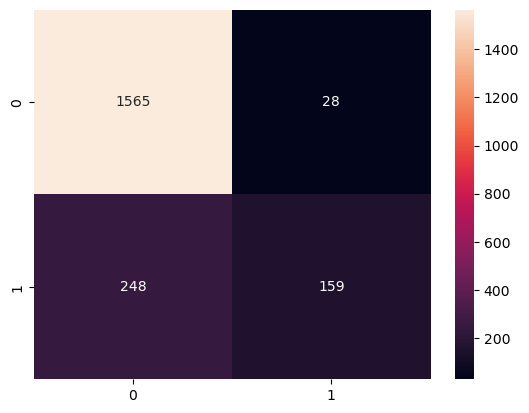

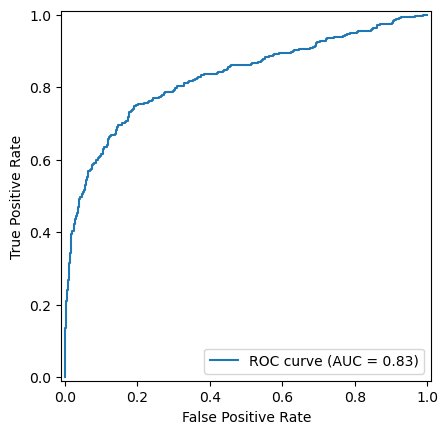

In [20]:
svm_model = SVC()
svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)
svm_score = svm_model.decision_function(X_test)

print("Support Vector Machine")
print("\n")
print(metrics.classification_report(y_test, y_pred))
print("Model aniqligi : ", metrics.accuracy_score(y_test, y_pred))

conf_mat = metrics.confusion_matrix(y_test, y_pred)
print("\n")
print(f"Confusion matrix :\n", conf_mat)
sns.heatmap(conf_mat, annot=True, fmt='g')
plt.show()

fpr, tpr, thresholds = metrics.roc_curve(y_test, svm_score)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

### Decision Tree

Deciosion Tree


              precision    recall  f1-score   support

           0       0.87      0.86      0.87      1593
           1       0.48      0.52      0.50       407

    accuracy                           0.79      2000
   macro avg       0.68      0.69      0.68      2000
weighted avg       0.79      0.79      0.79      2000

Model aniqligi :  0.788


Confusion matrix :
 [[1364  229]
 [ 195  212]]


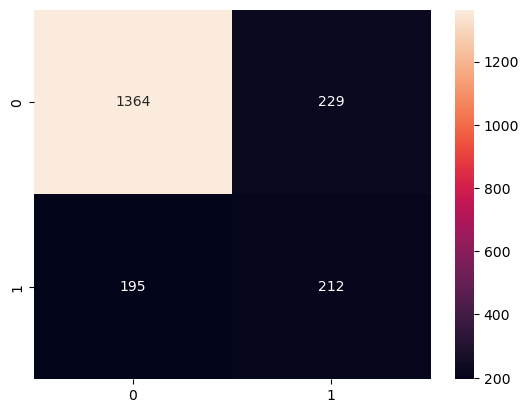

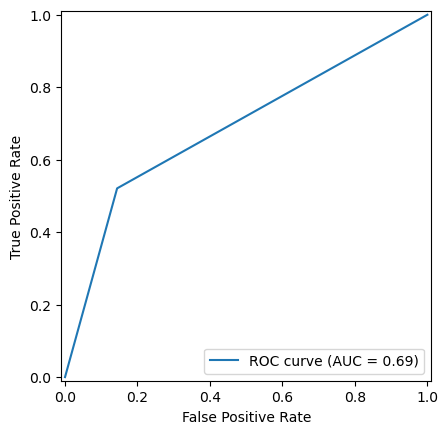

In [21]:
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

y_pred = tree_model.predict(X_test)
y_pred_prob = tree_model.predict_proba(X_test)[:, 1]

print("Deciosion Tree")
print("\n")
print(metrics.classification_report(y_test, y_pred))
print("Model aniqligi : ", metrics.accuracy_score(y_test, y_pred))

conf_mat = metrics.confusion_matrix(y_test, y_pred)
print("\n")
print(f"Confusion matrix :\n", conf_mat)
sns.heatmap(conf_mat, annot=True, fmt='g')
plt.show()

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

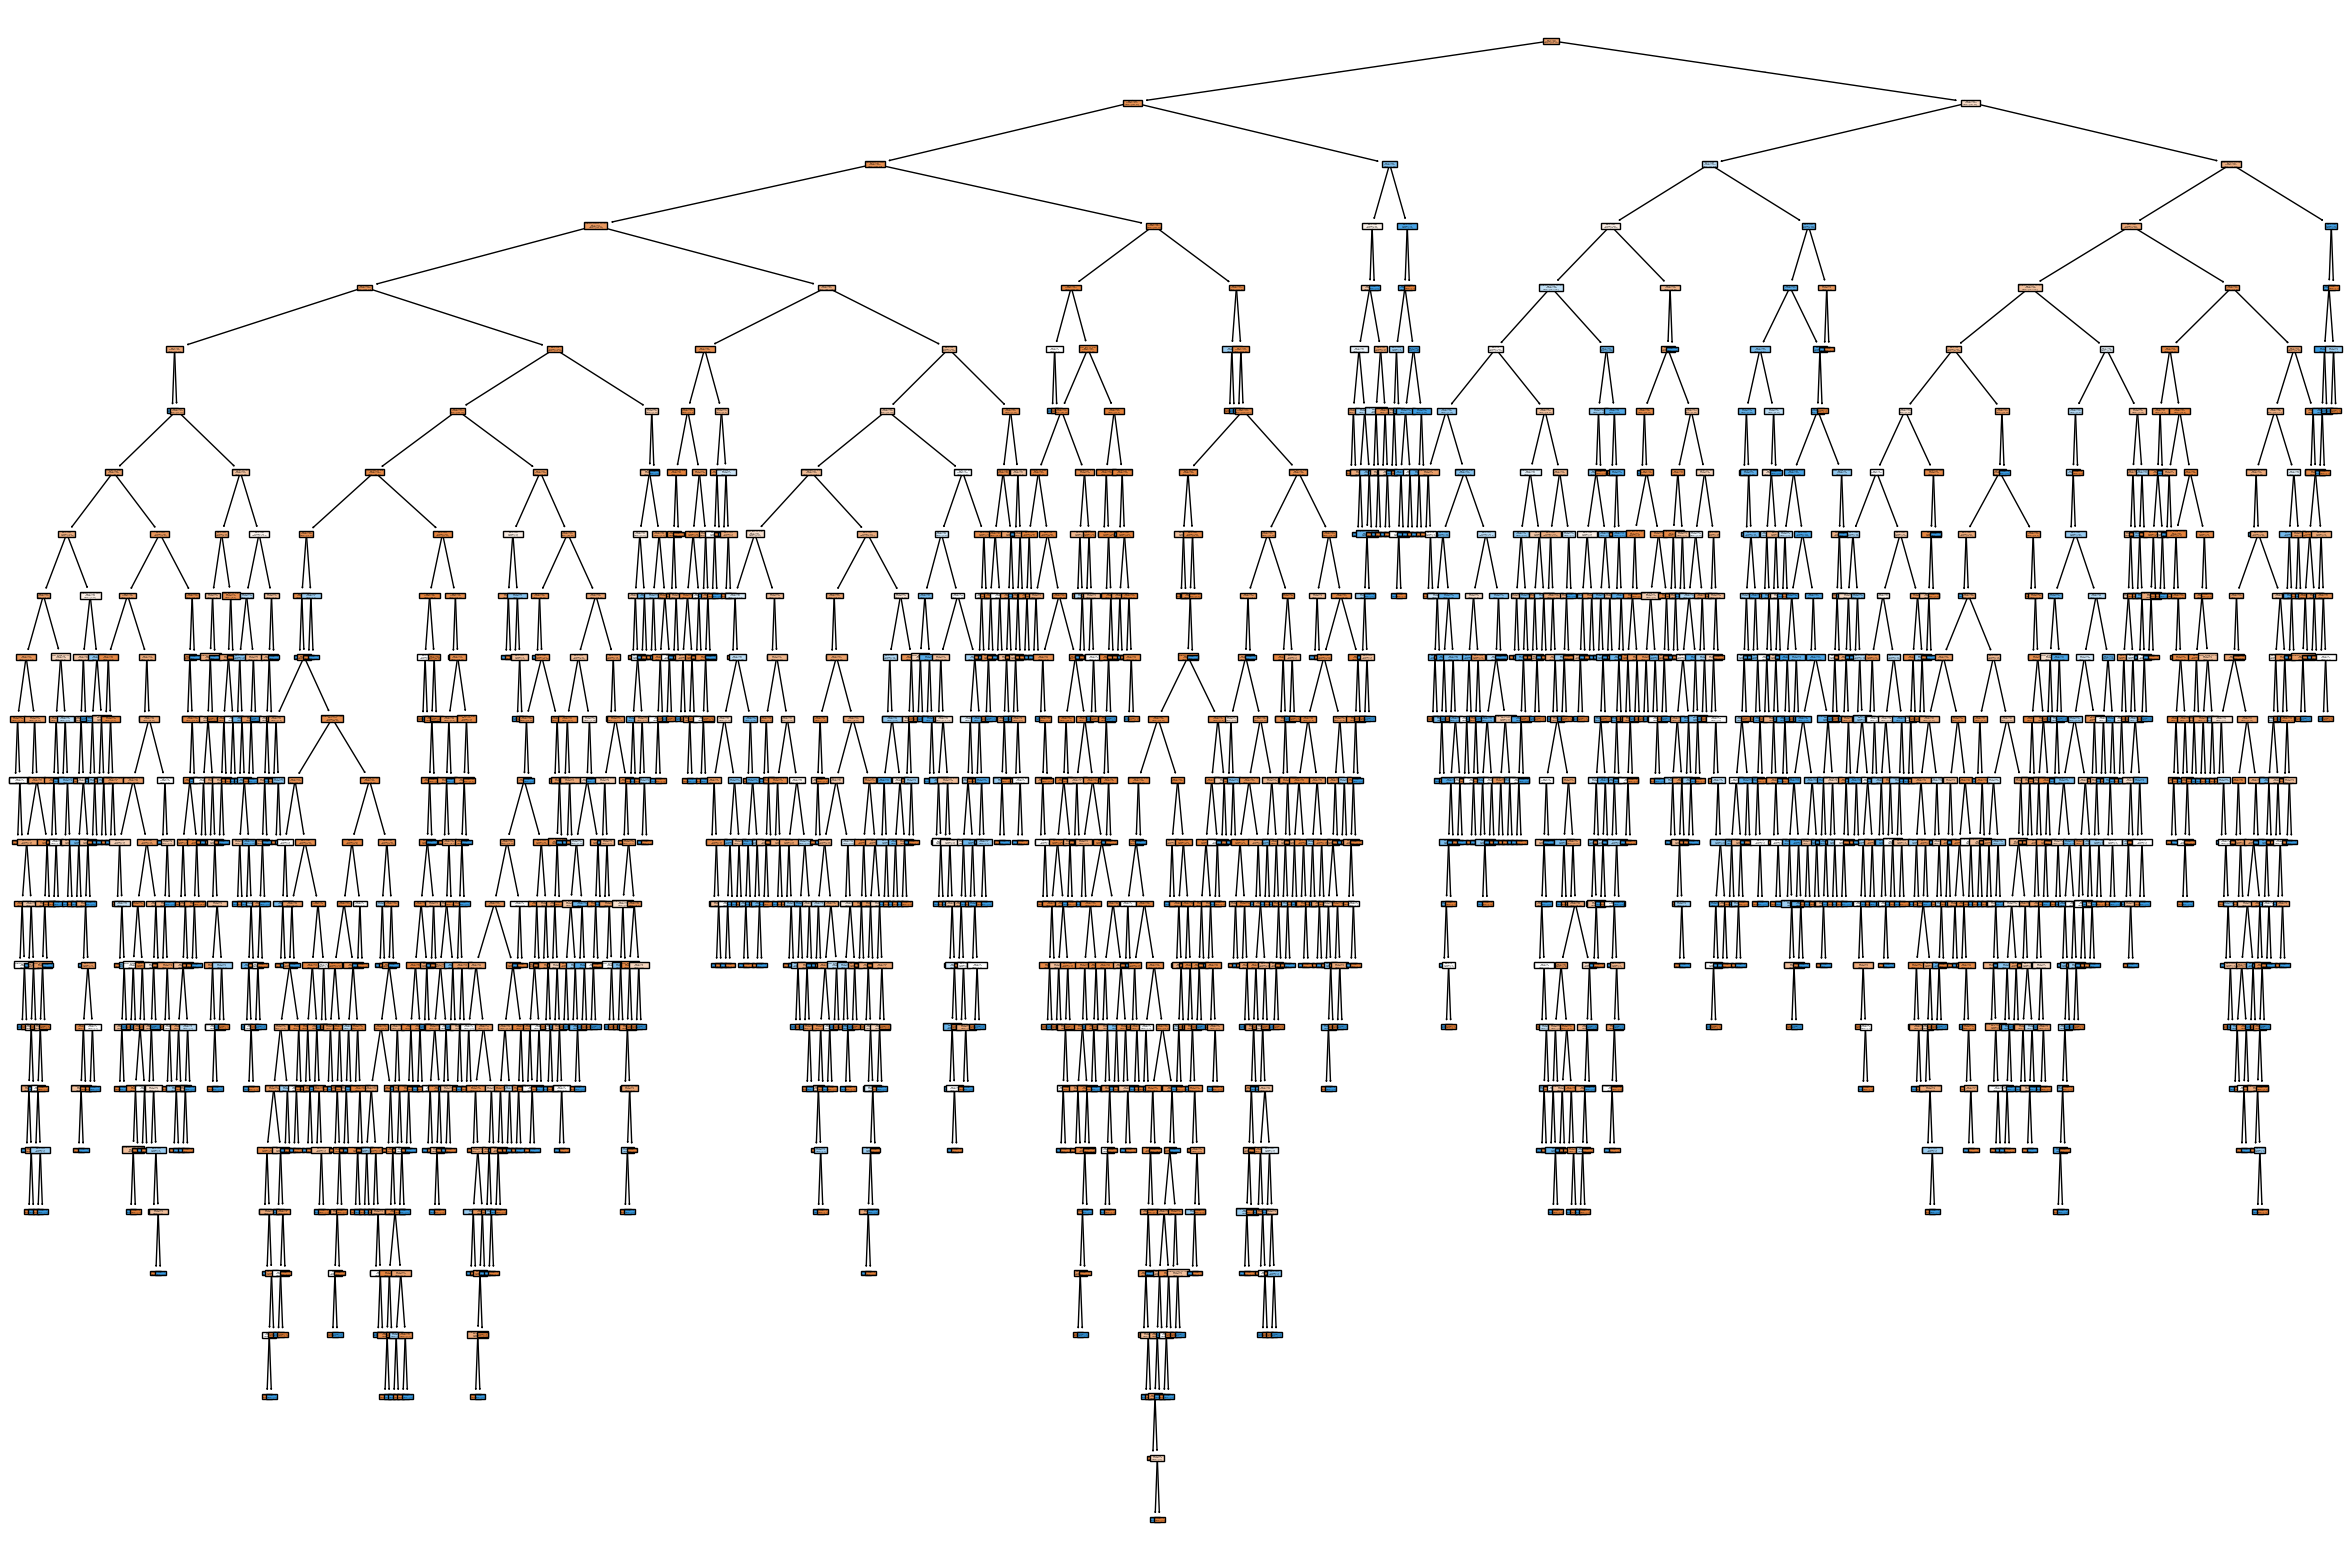

In [22]:
cols = encoded.drop('Exited', axis=1).columns
plt.figure(figsize=(30,20))
plot_tree(tree_model, feature_names=cols, filled=True)
plt.show()

### Random Forest

Random Forest


              precision    recall  f1-score   support

           0       0.87      0.96      0.92      1593
           1       0.75      0.45      0.57       407

    accuracy                           0.86      2000
   macro avg       0.81      0.71      0.74      2000
weighted avg       0.85      0.86      0.84      2000

Model aniqligi :  0.8585


Confusion matrix :
 [[1533   60]
 [ 223  184]]


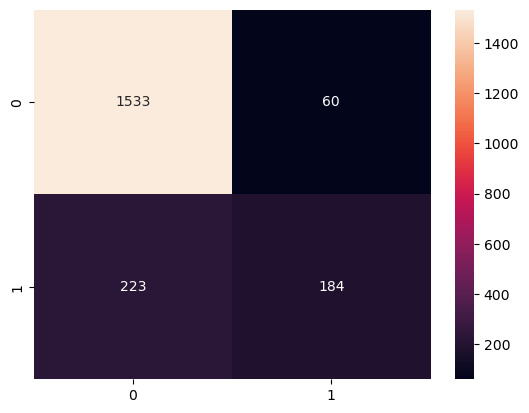

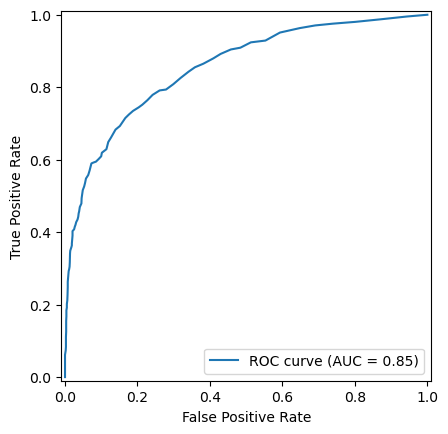

In [23]:
RF_model = RandomForestClassifier()
RF_model.fit(X_train, y_train)

y_pred = RF_model.predict(X_test)
y_pred_prob = RF_model.predict_proba(X_test)[:, 1]

print("Random Forest")
print("\n")
print(metrics.classification_report(y_test, y_pred))
print("Model aniqligi : ", metrics.accuracy_score(y_test, y_pred))

conf_mat = metrics.confusion_matrix(y_test, y_pred)
print("\n")
print(f"Confusion matrix :\n", conf_mat)
sns.heatmap(conf_mat, annot=True, fmt='g')
plt.show()

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

### XGBoost

XGBoost


              precision    recall  f1-score   support

           0       0.88      0.94      0.91      1593
           1       0.69      0.49      0.57       407

    accuracy                           0.85      2000
   macro avg       0.78      0.72      0.74      2000
weighted avg       0.84      0.85      0.84      2000

Model aniqligi :  0.851


Confusion matrix :
 [[1502   91]
 [ 207  200]]


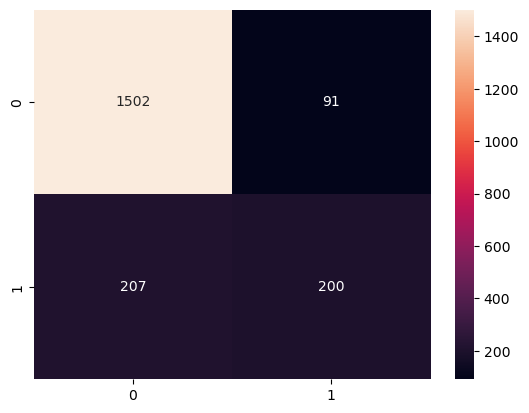

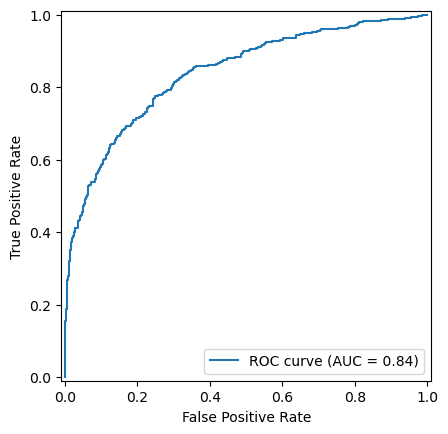

In [24]:
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)
y_pred_prob = xgb_model.predict_proba(X_test)[:, 1]

print("XGBoost")
print("\n")
print(metrics.classification_report(y_test, y_pred))
print("Model aniqligi : ", metrics.accuracy_score(y_test, y_pred))

conf_mat = metrics.confusion_matrix(y_test, y_pred)
print("\n")
print(f"Confusion matrix :\n", conf_mat)
sns.heatmap(conf_mat, annot=True, fmt='g')
plt.show()

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()